# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina
# **Tarea 1: Introducción a Numpy, Pandas y Matplotlib**

El objetivo de esta tarea es repasar y aprender contenidos básicos de estas librerías que les serán útiles para el resto del curso.

Recordar las instrucciones mencionadas en clases:
1. Para hacer esta tarea tienen que hacer un fork del repositorio en sus
cuentas de GitHub.
2. Luego deben habilitar sus cuentas de Google Colab (cuenta Google requerida)
3. Abrir Google Colab y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de respaldar cada avance significativo. Usen comentarios coherentes con cada respaldo "Sección de Numpy completada", "Tarea terminada", no solamente el que pone por defecto.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Numpy (Tiempo estimado: 15 min)

Una de las características principales que vuelven a Numpy tan útil son sus capacidades algebráicas, y la posibilidad de trabajar con conjuntos de datos de N dimensiones, lo que permite acelerar cálculos. Para destacar esto, a continuación se hacen una serie de ejercicios simples donde se pide que realicen las mismas operaciones usando Numpy y las listas de Python, y que luego comparen cuánto tarda cada operación.

Para visualizar la velocidad de Numpy respecto a las listas de Python, deberán correr las funciones que se les pide a continuación con $\textit{%timeit}$, de la siguiente manera:

```
%timeit nombre_funcion(parametro_1, parametro_2)
```

Esto entregará como output el tiempo medio que toma en correr la función y la desviación estándar


### Crear arreglos y listas
A continuación debes crear un par de listas de Python y un par de arreglos de Numpy. Estos arreglos son los que se utilizarán para testear las funciones que crearás en las celdas siguientes.

La primera lista debe ser una secuencia de números enteros desde 1 hasta 49. La segunda debe ir desde 101 hasta 149. Lo mismo para los arreglos.

In [2]:
# Listas
a_list = list(range(1, 50))
b_list = list(range(101, 150))

# Arreglos
a_arr = np.arange(1, 50)
b_arr = np.arange(101, 150)

### Suma de listas de elementos

* Cree la función $\textbf{suma_listas}$, que sume 2 listas de python $a$ y $b$.
* Cree la función $\textbf{suma_arrays}$, que sume 2 arrays de numpy $a$ y $b$.
* Compare la eficiencia de las 2 funciones utilizando $\textit{%timeit}$ para cada una

In [3]:
def suma_listas(a, b):
  suma = [a[i] + b[i] for i in range(len(a))]      # Crea una lista donde el elemento en la posición i es igual a la suma de los elementos de a y b en la misma posición
  return suma

def suma_arrays(a, b):
  return a+b

In [5]:
print("Tiempo suma_listas:")
%timeit suma_listas(a_list, b_list)

print("--------------------------")

print("Tiempo suma_arrays:")
%timeit suma_arrays(a_arr, b_arr)

Tiempo suma_listas:
7.62 µs ± 1.62 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
--------------------------
Tiempo suma_arrays:
726 ns ± 8.09 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Multiplicación de listas de elementos

* Cree la función $\textbf{mupliply_listas}$, que multiplique 2 listas de python $a$ y $b$
* Cree la función $\textbf{mupliply_arrays}$, que multiplique 2 listas de python $a$ y $b$
* Compare la eficiencia de las 2 funciones utilizando $\textit{%timeit}$ para cada una

In [6]:
def mupliply_listas(a, b):
  producto = [a[i] * b[i] for i in range(len(a))]      # Crea una lista donde el elemento en la posición i es igual al producto entre los elementos de a y b en la misma posición
  return producto

def mupliply_arrays(a, b):
  return a*b

In [7]:
print("Tiempo mupliply_listas:")
%timeit mupliply_listas(a_list, b_list)

print("--------------------------")

print("Tiempo mupliply_arrays:")
%timeit mupliply_arrays(a_arr, b_arr)

Tiempo mupliply_listas:
5.87 µs ± 48.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
--------------------------
Tiempo mupliply_arrays:
796 ns ± 164 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Aplicación práctica (IMF de Salpeter)

Las Funciones de Masa Inicial (IMF) son muy útil es astronomía pues nos da cuenta de un estimado del número de estrellas que se van a formar en un periodo de formación estelar a partir de un reservorio de masa M [referencia](https://es.wikipedia.org/wiki/Función_de_masa_inicial), lo que permite estudiar poblaciones estelares. En particular, si tenemos un rango de masas $[M_1, M_2]$, se puede demostrar que el número de estrellas que nacerán de un reservorio de masa $\xi_0$ (ignorar unidades) está dada por ecuación $(1)$

$$N = \frac{\xi_0}{1.35} (M_1^{-1.35} - M_2^{-1.35}) \tag{1}$$

Para esta prueba usted debe:

* Crear un array de masas $\textbf{lista_masas}$ que vaya desde $0.2 M_{\odot}$ hasta $80 M_{\odot}$, con pasos de $0.05 M_{\odot}$. Note que para este ejercicio puede ignorar la unidad de la masa.
* Recrear la ecuación $(1)$ como función en python. Considere $\xi_0=1$
* Calcular el número de estrellas que se formarán por intervalo de $\textbf{lista_masas}$, en $[0.2, 0.25], [0.25, 0.3], [0.3, 0.35], ..., [79.9, 79.95] y [79.95, 80]$ utilizando Numpy.
* Luego calcule el número total de estrellas formadas, es decir, sume todos los números de estrellas calculados en el punto anterior.


In [8]:
lista_masas = np.arange(0.2, 80.05, 0.05)

In [9]:
def IMF(m1, m2):
  N = ((m1**(-1.35)) - (m2**(-1.35)))/1.35
  return N

In [10]:
lista_estrellas = np.array([])

for i in range(np.size(lista_masas) - 1):                   # Calcula el número de estrellas para cada intervalo y lo agrega al arreglo
  lista_estrellas = np.append(lista_estrellas, IMF(lista_masas[i], lista_masas[i+1]))

print(lista_estrellas)

print("Total de estrellas formadas:" ,lista_estrellas.sum())

[1.69207841e+00 1.05018880e+00 7.07010806e-01 ... 1.69162663e-06
 1.68914077e-06 1.68666012e-06]
Total de estrellas formadas: 6.503428407627911


## 2. Pandas (Tiempo estimado 20 min)

Para esta sección veremos algunas de las funciones principales que existen dentro de pandas, dando una pincelada a sus capacidades. Como recomendación, puede explorar la [documentación](lista_masas), y mirar el tutorial [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html), pero no es obligatorio para esta parte.

### Creación de datos

Recree el siguiente DataFrame **almacen**:


|        | Manzana | Frutilla | Melón |
|--------|---------|----------|-------|
| Stock inicial  | 25      | 80       | 15    |
| Ventas | 14      | 60       | 6     |


In [11]:
datos = {                                       # Definimos “Stock inicial” y “Ventas" como columnas para facilitar los cálculos
    "Stock inicial": [25, 80, 15],
    "Ventas": [14, 60, 6]
}

almacen = pd.DataFrame(datos, index=["Manzana", "Frutilla", "Melón"])
print(almacen.T)                                # Se intercambian las filas con las columnas para llegar al DataFrame pedido

               Manzana  Frutilla  Melón
Stock inicial       25        80     15
Ventas              14        60      6


Haga ahora un inventario de la cantidad que queda por producto después de las ventas, y añada la fila **bodega** con esta información.

In [12]:
almacen["Bodega"] = almacen["Stock inicial"] - almacen["Ventas"]
print(almacen.T)

               Manzana  Frutilla  Melón
Stock inicial       25        80     15
Ventas              14        60      6
Bodega              11        20      9


### Visualización de Tablas
Para esta parte primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importe el dataset (archivo **censo.csv**) utilizando la función **pd.load_csv(path)** y guárdelo como **df_censo**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "censo.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [14]:
path = '/content/drive/MyDrive/Tarea_1/censo.csv'
df_censo = pd.read_csv(path)

Con este dataset se pide hacer lo siguiente:

* Vea los primeros 10 elementos de $\textbf{df_censo}$
* Vea las columnas del dataframe
* Traduzca las columnas a español (manualmente).
* Use la función $\textbf{describe}$ para visualizar la estadística de cada columna del dataframe. ¿Ve algo que no tiene sentido?

In [15]:
df_censo.head(10)

,name,city,age,n_siblings
0,Paula_Miguel_Garcia_Gonzalez,Iquique,35,0
1,Maria_Pedro_Jimenez_Lopez,Rancagua,49,-1
2,Carolina_Juan_Jimenez_Gonzalez,Iquique,16,1
3,Lucia_Marta_Jimenez_Sanz,Santiago,42,2
4,Marta_Roberto_Garcia_Sanz,Valparaiso,12,3
5,Roberto_Paula_Lopez_Gomez,Arica,38,-2
6,Pedro_Valentina_Garcia_Hernandez,Santiago,40,0
7,Sofia_Marta_Garcia_Garcia,Santiago,10,1
8,Carolina_Eduardo_Perez_Gonzalez,Santiago,40,0
9,Pedro_Julia_Gonzalez_Gonzalez,Santiago,55,0


In [16]:
df_censo.columns

Index(['name', 'city', 'age', 'n_siblings'], dtype='object')

In [17]:
traduccion = {"name": "nombre", "city": "ciudad", "age": "edad", "n_siblings": "n_hermanos"}        # Se renombran las columnas en base al diccionario.
df_censo.rename(columns = traduccion, inplace=True)           # El parámetro inplace indica que se modificará el DataFrame actual en vez de crear uno nuevo
df_censo.head()

,nombre,ciudad,edad,n_hermanos
0,Paula_Miguel_Garcia_Gonzalez,Iquique,35,0
1,Maria_Pedro_Jimenez_Lopez,Rancagua,49,-1
2,Carolina_Juan_Jimenez_Gonzalez,Iquique,16,1
3,Lucia_Marta_Jimenez_Sanz,Santiago,42,2
4,Marta_Roberto_Garcia_Sanz,Valparaiso,12,3


In [18]:
df_censo.describe()

,edad,n_hermanos
count,2000.000000,2000.00000
mean,34.286500,0.75000
std,14.724158,1.73234
min,-26.000000,-6.00000
25%,24.000000,0.00000
50%,34.000000,0.00000
75%,44.000000,2.00000
max,84.000000,7.00000


### Filtar los datos

Repare el dataframe siguiendo los siguientes pasos:

* Descarte los elementos del dataframe donde la edad sea menor a cero.
* Reemplace los casos en que el número de hermanos es menor a cero por cero.
* Descarte los casos en que el mismo nombre aparezca más de una vez (use la función [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) y mantenga el primer elemento: keep = 'first').


In [19]:
df_censo = df_censo[df_censo["edad"] >= 0]

df_censo.loc[df_censo["n_hermanos"] < 0] = 0

df_censo = df_censo.drop_duplicates("nombre", keep="first")

df_censo.describe()

,edad,n_hermanos
count,1604.000000,1604.000000
mean,34.459476,1.258728
std,14.378286,1.403504
min,0.000000,0.000000
25%,24.000000,0.000000
50%,34.000000,1.000000
75%,44.000000,2.000000
max,84.000000,7.000000


## 3. Matplotlib

Matplotlib es la librería que nos permitirá crear todo tipo de figuras para visualizar nuestros datos ([documentación](https://matplotlib.org/stable/index.html)). A pesar de su popularidad, no posee una gran versatilidad al momento de hacer una visulización interactiva. Sin embargo,su fiabilidad y simplicidad la han hecho una de las librerías fundamentales para la ciencia de datos en Python.

### Visualización simple

Genere un arreglo de 100 números que vayan desde 0 a 4$\pi$.

In [20]:
x_values = np.linspace(0,4*np.pi,1000)

Utilizando las funciones **np.sin()** y **np.cos()** de numpy, cree la siguiente función:
$$f(x) = 1.5[\sin(3x+\pi/4)+\cos(2x)] \tag{2}$$

Luego aplique la función al arreglo generado en la celda de arriba y grafique. Haga el plot sin crear una figura, es decir solo usando el comando **plt.plot(x, y)**.


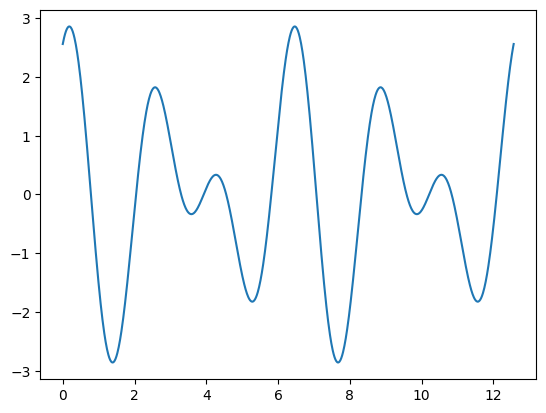

In [21]:
def f(x):
  return 1.5*(np.sin(3*x + np.pi/4) + np.cos(2*x))

plt.plot(x_values, f(x_values))

Ahora incluya también en el plot la misma función  pero con un poco de ruido. Para esto simplemente debes sumar la variable **ruido** definida abajo a la función.

Plotee la función ruidosa de color rojo, y en azul la función sin ruido. Incluya además una leyenda con **plt.legend()**. Ojo que para que aparezca la leyenda de la figura, en **plt.plot()** debe incluir el parámetro **label**

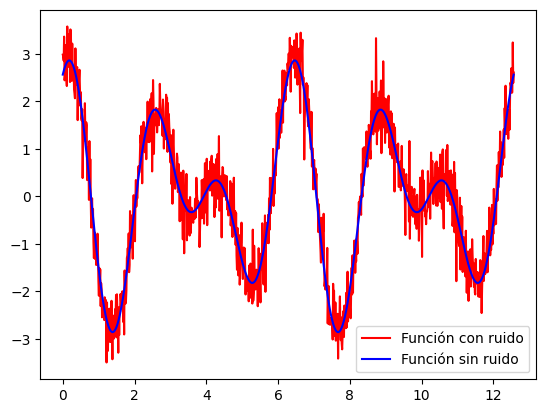

In [22]:
np.random.seed(19680801)
ruido = 0.4*np.random.randn(len(x_values))

plt.plot(x_values, f(x_values) + ruido, label="Función con ruido", c="r")
plt.plot(x_values, f(x_values), label="Función sin ruido", c="b")

plt.legend()

plt.show()

Es una buena práctica también el siempre inicializar una figura. Esto además permite definir un tamaño al plot que se va a generar. Use **plt.figure(figsize=(size_x, size_y))** para cambiar el tamaño de la figura y recree todo lo que hizo en la celda anterior.


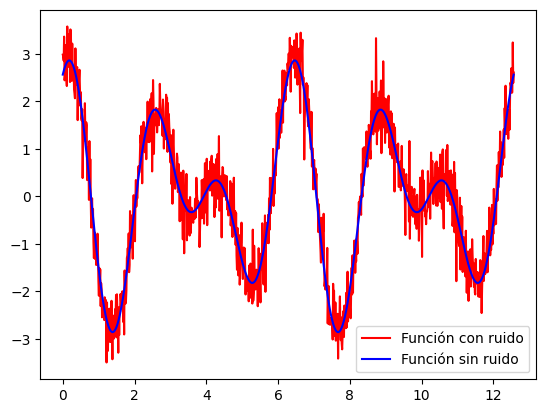

<Figure size 1000x600 with 0 Axes>

In [23]:
plt.plot(x_values, f(x_values) + ruido, label="Función con ruido", c="r")
plt.plot(x_values, f(x_values), label="Función sin ruido", c="b")

plt.legend()
plt.figure(figsize=(10, 6))

plt.show()

Para estas funciones, sabemos que tiene un mayor sentido definir el eje x en función de $\pi$ en lugar de números enteros. Haga de nuevo la figura pero ahora utilize la función **plt.xticks()** para reescribir los valores de x como múltiplos de $\pi$. Utilice como labels la lista **xticks_labels** que ya está definida.

Además, tenga en cuenta que se puede escribir texto en latex de la siguiente forma:
```
r'$\pi$'
```



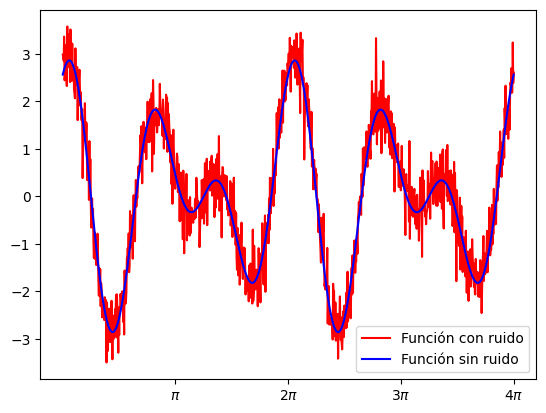

<Figure size 1000x600 with 0 Axes>

In [24]:
xticks_labels = [r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$']
xticks = [np.pi, 2*np.pi, 3*np.pi, 4*np.pi]

plt.plot(x_values, f(x_values) + ruido, label="Función con ruido", c="r")
plt.plot(x_values, f(x_values), label="Función sin ruido", c="b")

plt.xticks(xticks, xticks_labels)

plt.legend()
plt.figure(figsize=(10, 6))

plt.show()

Como ultimo paso, agregue una grilla con **plt.grid(True)**. Además añada un título a la figura y labels en ambos ejes (x e y) que tengan sentido.


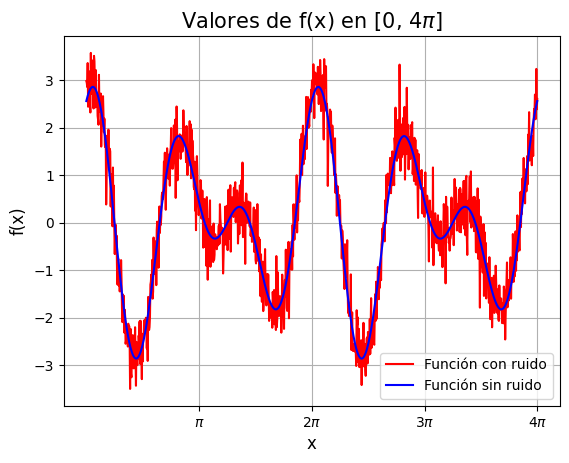

<Figure size 1000x600 with 0 Axes>

In [25]:
plt.plot(x_values, f(x_values) + ruido, label="Función con ruido", c="r")
plt.plot(x_values, f(x_values), label="Función sin ruido", c="b")

plt.xticks(xticks, xticks_labels)
plt.grid(True)

plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.title(r"Valores de f(x) en [0, $4\pi$]", fontsize=15)

plt.legend()
plt.figure(figsize=(10, 6))

plt.show()

### Visualización distribución de estrellas

El archivo **galaxy2.csv** contiene datos de la posición de estrellas sintéticas de una galaxia. Al igual que en la sección anterior, cargue los datos utilizando **pd.read_csv()**.

In [26]:
path = "/content/drive/MyDrive/Tarea_1/galaxy2.csv"
datos = pd.read_csv(path)

Vea los primeros 10 elementos del dataframe. ¿Qué tipo de información puede encontrar? Dado el nombre de las columnas, ¿en qué unidades se encuentran?

**Respuesta:** Se encuentra la posición y velocidad de cada estrella en los ejes x,y,z. Las posiciones se encuentran en metros y las velocidades en metros por segundo. También se está la información de la columna “key”, que probablemente identifica cada estrella.

In [27]:
datos.head(10)

,key,x[m],y[m],z[m],vx[m/s],vy[m/s],vz[m/s]
0,2536799254509432540,9.016510e+17,4.745163e+17,3.009401e+16,-1.625572e+06,2.845114e+06,-3.486599e+04
1,16568176108934293527,-9.545587e+16,-2.795457e+17,-2.217165e+16,1.855060e+06,-1.920465e+06,-2.893263e+05
2,212848180443948653,4.908724e+17,-1.870607e+18,9.142949e+15,3.380713e+06,7.971010e+05,4.905219e+04
3,584293945272726282,-8.367689e+17,-2.974291e+17,-4.054180e+15,6.618865e+05,-3.375086e+06,2.686391e+05
4,15485527814176396751,2.343487e+16,2.799849e+17,-2.554723e+16,-2.484394e+06,-1.171416e+05,-5.705734e+05
5,3355351822461698455,-5.025008e+17,-8.725557e+17,-5.071959e+15,2.700085e+06,-2.203650e+06,-1.303846e+05
6,11306543906972088773,-7.294104e+16,2.996010e+17,2.552034e+16,-3.080776e+06,-1.458240e+06,1.005820e+06
7,783275702291551918,4.886403e+16,-1.366570e+18,4.799806e+14,3.573072e+06,3.520636e+04,-2.359365e+03
8,2994623897157713080,-1.850651e+17,1.004086e+18,-5.464441e+15,-3.330370e+06,-7.812421e+05,-7.749480e+04
9,13439637019970929881,1.918695e+17,1.011757e+17,2.188518e+16,-1.188553e+06,2.041306e+06,-5.645056e+05


Plotee las estrellas en el plano $[x, y]$ utilizando **plt.plot()**. Para hacer esto hay que plotear solo los marcadores, esto se puede hacer con: **marker=' . ', linestyle='  '**, o simplemente con **' . '**. Recuerde agregar los labels en cada eje.

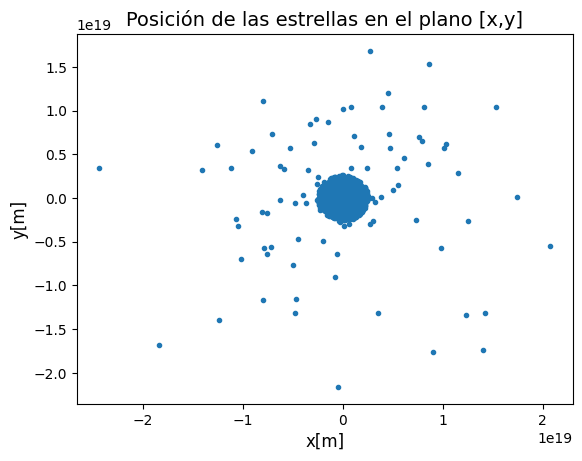

<Figure size 1920x1080 with 0 Axes>

In [28]:
plt.plot(datos["x[m]"], datos["y[m]"], marker=".", linestyle="")

plt.xlabel("x[m]", fontsize=12)
plt.ylabel("y[m]", fontsize=12)
plt.title("Posición de las estrellas en el plano [x,y]", fontsize=14)

plt.figure(figsize=(19.2, 10.8))

plt.show()

Se puede ver que muchas de las estrellas se extienden muy lejos de la galaxia. Para simplificar la visualización setee un **plt.xlim()** y **plt.ylim()** en el rago que considere que funcione mejor (Recomendación, como los números son muy grandes, use la notación $1eN$, con $N$ el orden de magnitud, para facilitar la escritura).

Adicionalmente, cuando se trabaja con marcadores, podemos usar el parámetro **markersize** para modificar su tamaño. El plot anterior muestra con bastante claridad las estrellas que están más lejanas, pero dificulta la visualización de las regiones más centrales de la galaxia. Actualice el tamaño de los marcadores a $0.5$, de manera que sea más suave la visualización de la distribución de estrellas. Plotee además las estrellas vistas en el plano $[x, y]$, $[x, z]$, $[y, z]$.

Recuerde agregar los labels en cada eje.

Póngase creativo con los gráficos, defina tamaños de la figura, agregue colores, defina los tamaños de los labels, etc.

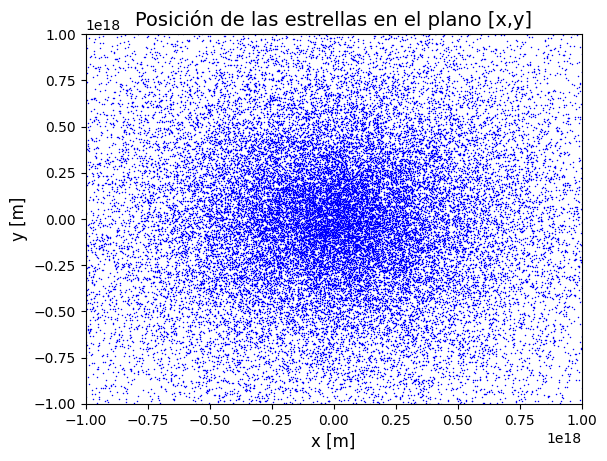

<Figure size 1500x900 with 0 Axes>

In [29]:
#Plot de datos plano [x, y]
plt.plot(datos["x[m]"], datos["y[m]"], marker="*", markersize=0.5, linestyle="", color="b")

plt.xlabel("x [m]", fontsize=12)
plt.ylabel("y [m]", fontsize=12)
plt.title("Posición de las estrellas en el plano [x,y]", fontsize=14)

plt.xlim(-1e18, 1e18)
plt.ylim(-1e18, 1e18)

plt.figure(figsize=(15, 9))

plt.show()

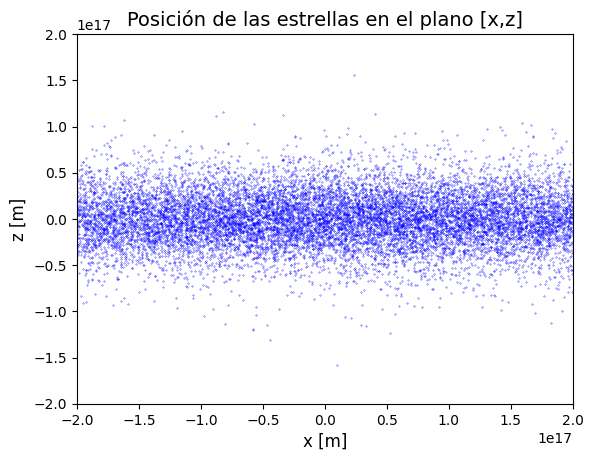

<Figure size 1500x900 with 0 Axes>

In [30]:
#Plot de datos plano [x, z]
plt.plot(datos["x[m]"], datos["z[m]"], marker=".", markersize=0.5, linestyle="", color="b")

plt.xlabel("x [m]", fontsize=12)
plt.ylabel("z [m]", fontsize=12)
plt.title("Posición de las estrellas en el plano [x,z]", fontsize=14)

plt.xlim(-2e17, 2e17)
plt.ylim(-2e17, 2e17)

plt.figure(figsize=(15, 9))

plt.show()

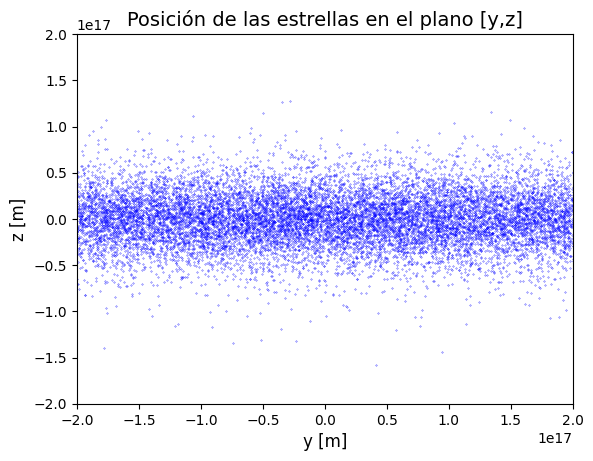

<Figure size 1500x900 with 0 Axes>

In [31]:
#Plot de datos plano [y, z]
plt.plot(datos["y[m]"], datos["z[m]"], marker=".", markersize=0.5, linestyle="", color="b")

#Configuraciones del plot
plt.xlabel("y [m]", fontsize=12)
plt.ylabel("z [m]", fontsize=12)
plt.title("Posición de las estrellas en el plano [y,z]", fontsize=14)

plt.xlim(-2e17, 2e17)
plt.ylim(-2e17, 2e17)

plt.figure(figsize=(15, 9))

plt.show()

#### Distribuciones

Calcule la distancia $r$ y ángulo $\theta$ de cada una de las estrellas y añada estos valores a las columnas del dataframe original. Donde

$r = \sqrt{x^2 + y^2 + z^2}$

$θ = \arctan(y/x)$


In [32]:
datos["distancia"] = np.sqrt(datos["x[m]"]**2 + datos["y[m]"]**2 + datos["z[m]"]**2)

datos["ángulo"] = np.rad2deg(np.arctan(datos["y[m]"]/datos["x[m]"]))   #Pasamos los radianes a grados

datos.head(10)

,key,x[m],y[m],z[m],vx[m/s],vy[m/s],vz[m/s],distancia,ángulo
0,2536799254509432540,9.016510e+17,4.745163e+17,3.009401e+16,-1.625572e+06,2.845114e+06,-3.486599e+04,1.019336e+18,27.756709
1,16568176108934293527,-9.545587e+16,-2.795457e+17,-2.217165e+16,1.855060e+06,-1.920465e+06,-2.893263e+05,2.962249e+17,71.146615
2,212848180443948653,4.908724e+17,-1.870607e+18,9.142949e+15,3.380713e+06,7.971010e+05,4.905219e+04,1.933962e+18,-75.296334
3,584293945272726282,-8.367689e+17,-2.974291e+17,-4.054180e+15,6.618865e+05,-3.375086e+06,2.686391e+05,8.880668e+17,19.567731
4,15485527814176396751,2.343487e+16,2.799849e+17,-2.554723e+16,-2.484394e+06,-1.171416e+05,-5.705734e+05,2.821230e+17,85.215469
5,3355351822461698455,-5.025008e+17,-8.725557e+17,-5.071959e+15,2.700085e+06,-2.203650e+06,-1.303846e+05,1.006919e+18,60.062558
6,11306543906972088773,-7.294104e+16,2.996010e+17,2.552034e+16,-3.080776e+06,-1.458240e+06,1.005820e+06,3.094066e+17,-76.316935
7,783275702291551918,4.886403e+16,-1.366570e+18,4.799806e+14,3.573072e+06,3.520636e+04,-2.359365e+03,1.367443e+18,-87.952164
8,2994623897157713080,-1.850651e+17,1.004086e+18,-5.464441e+15,-3.330370e+06,-7.812421e+05,-7.749480e+04,1.021013e+18,-79.556902
9,13439637019970929881,1.918695e+17,1.011757e+17,2.188518e+16,-1.188553e+06,2.041306e+06,-5.645056e+05,2.180123e+17,27.803361


Finalmente, visualize la distribución de $r$ y $\theta$ con un histograma. Esto se puede contruir desde cero con matplotlib, sin embargo pandas simplifica hacer análisis como estos, permitiendo rápidamente hacer diferentes análisis estadísticos. El siguiente codigo muestra como se puede plotear un histograma a partir de un dataframe de Pandas:


```
dataframe.plot.hist(y=column_name, bins=n_bins)
```

Utilice una escala logarítmica en el eje vertical del histograma de la coordenada radial ($r$). Use la cantidad de bins que considere que representen bien la distribución.



<Axes: ylabel='Frequency'>

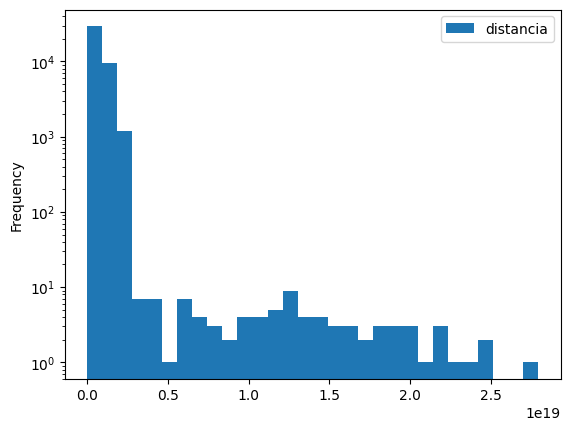

In [33]:
datos.plot.hist(y="distancia", bins=30, logy=True)

<Axes: ylabel='Frequency'>

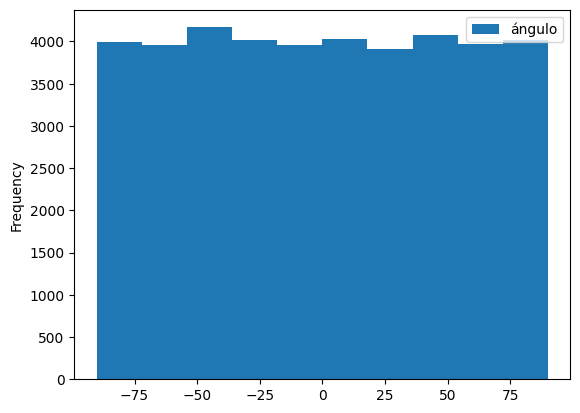

In [34]:
datos.plot.hist(y="ángulo", bins=10)